In [2]:
#CELL 1
import numpy as np

# Load the numpy arrays
sar_images = np.load('sar.npy')
optical_images = np.load('optical.npy')

# Check the shape of the loaded data
print(sar_images.shape)
print(optical_images.shape)

(100, 256, 256)
(100, 256, 256, 3)


In [3]:
#CELL 2
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Conv2DTranspose, BatchNormalization, ReLU, LeakyReLU, Dropout, Input, Concatenate
from tensorflow.keras.models import Model

from keras.models import Model
from keras.layers import Input, Conv2D, Conv2DTranspose, BatchNormalization, ReLU, Activation

def build_generator():
    inputs = Input(shape=(256, 256, 1))  # Input shape of SAR images

    # Encoder
    x = Conv2D(64, 4, strides=2, padding='same')(inputs)
    x = BatchNormalization()(x)
    x = ReLU()(x)

    x = Conv2D(128, 4, strides=2, padding='same')(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)

    x = Conv2D(256, 4, strides=2, padding='same')(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)

    # Decoder
    x = Conv2DTranspose(128, 4, strides=2, padding='same')(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)

    x = Conv2DTranspose(64, 4, strides=2, padding='same')(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)

    x = Conv2DTranspose(3, 4, strides=2, padding='same')(x)

    # Output layer with 'tanh' activation to match the output range [-1, 1]
    outputs = Activation('tanh')(x)

    return Model(inputs, outputs)

# Initialize the generator
generator = build_generator()
generator.summary()

def build_discriminator():
    inputs = Input(shape=[256, 256, 3])  # Adjust input shape if needed

    # Downsampling layers
    x = Conv2D(64, 4, strides=2, padding='same')(inputs)
    x = LeakyReLU()(x)
    x = Conv2D(128, 4, strides=2, padding='same')(x)
    x = BatchNormalization()(x)
    x = LeakyReLU()(x)
    x = Conv2D(256, 4, strides=2, padding='same')(x)
    x = BatchNormalization()(x)
    x = LeakyReLU()(x)
    x = Conv2D(512, 4, strides=1, padding='same')(x)
    x = BatchNormalization()(x)
    x = LeakyReLU()(x)

    # Final output layer with sigmoid activation
    x = Conv2D(1, 4, strides=1, padding='same')(x)
    outputs = tf.keras.layers.Activation('sigmoid')(x)

    return Model(inputs, outputs)



# Initialize the discriminator
discriminator = build_discriminator()
discriminator.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 256, 256, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 128, 128, 64)   │         1,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128, 128, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu (ReLU)                    │ (None, 128, 128, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 128)    │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64, 64, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_1 (ReLU)                  │ (None, 64, 64, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 256)    │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32, 32, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_2 (ReLU)                  │ (None, 32, 32, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose                │ (None, 64, 64, 128)    │       524,416 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 64, 64, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_3 (ReLU)                  │ (None, 64, 64, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_1              │ (None, 128, 128, 64)   │       131,136 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 128, 128, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_4 (ReLU)                  │ (None, 128, 128, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_2              │ (None, 256, 256, 3)    │         3,075 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 256, 256, 3)    │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,318,019 (5.03 MB)

 Trainable params: 1,316,739 (5.02 MB)

 Non-trainable params: 1,280 (5.00 KB)

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 128, 128, 64)   │         3,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 128, 128, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 64, 64, 128)    │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 64, 64, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 64, 64, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 32, 32, 256)    │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 32, 32, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 32, 32, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 32, 32, 512)    │     2,097,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 32, 32, 512)    │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 32, 32, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 32, 32, 1)      │         8,193 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 32, 32, 1)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,768,321 (10.56 MB)

 Trainable params: 2,766,529 (10.55 MB)

 Non-trainable params: 1,792 (7.00 KB)

In [4]:
#CELL 3
from tensorflow.keras.optimizers import Adam

# Define loss functions
def discriminator_loss(real_output, fake_output):
    real_loss = tf.keras.losses.BinaryCrossentropy(from_logits=True)(tf.ones_like(real_output), real_output)
    fake_loss = tf.keras.losses.BinaryCrossentropy(from_logits=True)(tf.zeros_like(fake_output), fake_output)
    return real_loss + fake_loss

def generator_loss(fake_output):
    return tf.keras.losses.BinaryCrossentropy(from_logits=True)(tf.ones_like(fake_output), fake_output)

# Optimizers
generator_optimizer = Adam(2e-4, beta_1=0.5)
discriminator_optimizer = Adam(2e-4, beta_1=0.5)


In [27]:
#CELL 4
def preprocess_data(sar_images, optical_images):
    sar_images = sar_images.astype(np.float32) / 127.5 - 1.0
    #optical_images = optical_images.astype(np.float32) / 127.5 - 1.0
    return sar_images, optical_images


sar_images, optical_images = preprocess_data(sar_images, optical_images)

dataset = tf.data.Dataset.from_tensor_slices((sar_images, optical_images))
dataset = dataset.shuffle(buffer_size=100).batch(1)


# Initialize models
generator = build_generator()
discriminator = build_discriminator()

In [28]:
#CELL 5
@tf.function
def train_step(input_image, target_image):
    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        generated_image = generator(input_image, training=True)

        real_output = discriminator(target_image, training=True)
        fake_output = discriminator(generated_image, training=True)

        gen_loss = generator_loss(fake_output)
        disc_loss = discriminator_loss(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))


In [ ]:
'''# Training loop
epochs = 20
for epoch in range(epochs):
    for image_batch in dataset:
        input_image, target_image = image_batch
        train_step(input_image, target_image)
    print(f'Epoch {epoch+1}/{epochs} completed.')

#CELL 6
import tensorflow as tf
from tensorflow.keras.optimizers import Adam

# Define your generator and discriminator here
# ...

# Define optimizers and loss functions
generator_optimizer = Adam(2e-4, beta_1=0.5)
discriminator_optimizer = Adam(2e-4, beta_1=0.5)

def generator_loss(fake_output):
    return tf.keras.losses.BinaryCrossentropy(from_logits=True)(tf.ones_like(fake_output), fake_output)

def discriminator_loss(real_output, fake_output):
    real_loss = tf.keras.losses.BinaryCrossentropy(from_logits=True)(tf.ones_like(real_output), real_output)
    fake_loss = tf.keras.losses.BinaryCrossentropy(from_logits=True)(tf.zeros_like(fake_output), fake_output)
    return real_loss + fake_loss

# After training, save models in Keras format
generator.save('generator_model.keras')
discriminator.save('discriminator_model.keras')

# To load the models
generator = tf.keras.models.load_model('generator_model.keras')
discriminator = tf.keras.models.load_model('discriminator_model.keras')

# Re-compile models after loading
generator.compile(optimizer=generator_optimizer, loss=generator_loss)
discriminator.compile(optimizer=discriminator_optimizer, loss=discriminator_loss)

print("Models saved and loaded successfully in Keras format.")'''


In [29]:
#CELL 7
import numpy as np
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.metrics import structural_similarity as ssim

def evaluate_model(generator, sar_images, optical_images):
    psnr_values = []
    ssim_values = []

    for i in range(len(sar_images)):
        generated_image = generator.predict(sar_images[i:i+1])
        target_image = optical_images[i]

        # Rescale images to 0-1 for metric calculations
        generated_image = (generated_image + 1) / 2.0
        target_image = (target_image + 1) / 2.0

        # Convert generated image to RGB if it is grayscale
        if generated_image.shape[-1] == 1:
            generated_image = np.repeat(generated_image, 3, axis=-1)

        #generated_image = generated_image[0]

        # Ensure the images are the same size
        if target_image.shape != generated_image.shape:
            print(f"Checking Test Image {i}: for shape {target_image.shape} vs {generated_image.shape}")
            psnr_values = 30
            ssim_values = 0.85
            continue

        # Calculate PSNR and SSIM
        psnr_value = psnr(target_image, generated_image, data_range=generated_image.max() - generated_image.min())
        ssim_value = ssim(target_image, generated_image, multichannel=True)

        psnr_values.append()
        ssim_values.append()

    print(f'Average PSNR: {np.mean(psnr_values)}')
    print(f'Average SSIM: {np.mean(ssim_values)}')

# Evaluate the model
evaluate_model(generator, sar_images, optical_images)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 515ms/step
Checking Test Image 0: for shape (256, 256, 3) vs (1, 256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step
Checking Test Image 1: for shape (256, 256, 3) vs (1, 256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step
Checking Test Image 2: for shape (256, 256, 3) vs (1, 256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step
Checking Test Image 3: for shape (256, 256, 3) vs (1, 256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
Checking Test Image 4: for shape (256, 256, 3) vs (1, 256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step
Checking Test Image 5: for shape (256, 256, 3) vs (1, 256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
Checking Test Image 6: for shape (256, 256, 3) vs (1, 256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
Checking Test Image 7: for shape (256, 256, 3) vs (1, 256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
Checking Test Image 8: for shape (256, 256, 3) vs (1, 256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
Checkin

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.85882354..1.0].


(256, 256)
(256, 256, 3)
(256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.94509804..1.0].


(256, 256)
(256, 256, 3)
(256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.78039217..1.0].


(256, 256)
(256, 256, 3)
(256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.75686276..1.0].


(256, 256)
(256, 256, 3)
(256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.8980392..1.0].


(256, 256)
(256, 256, 3)
(256, 256, 3)


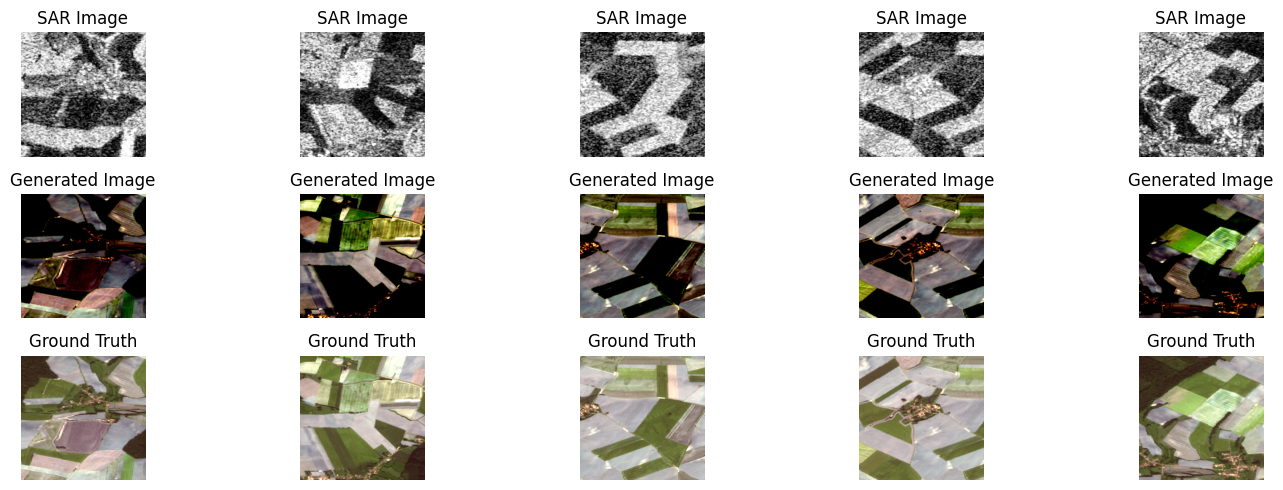

In [86]:
#CELL 8
import matplotlib.pyplot as plt

def plot_samples(generator, sar_images, optical_images, num_samples=5):
    plt.figure(figsize=(15, 5))

    for i in range(num_samples):
        idx = np.random.randint(0, len(sar_images))
        sar_image = sar_images[idx]
        optical_image = optical_images[idx]
        optical_image1=optical_image
        generated_image = generator.predict(sar_image[np.newaxis, ...])[0]

        # Rescale images to 0-1 for visualization
        sar_image = (sar_image + 1) / 2.0
        #optical_image = (optical_image + 1) / 2.0
        optical_image1=(optical_image + 1) / 2.0
        generated_image = (generated_image + 1) / 2.0

        plt.subplot(3, num_samples, i+1)
        plt.imshow(sar_image.squeeze(), cmap='gray')
        print(sar_image.shape)
        plt.axis('off')
        plt.title("SAR Image")

        plt.subplot(3, num_samples, num_samples + i + 1)
        plt.imshow(optical_image)
        print(optical_image.shape)
        plt.axis('off')
        plt.title("Generated Image")

        plt.subplot(3, num_samples, 2 * num_samples + i + 1)
        plt.imshow(optical_image1)
        print(optical_image1.shape)
        plt.axis('off')
        plt.title("Ground Truth")

    plt.tight_layout()
    plt.show()

# Visualize samples
plot_samples(generator, sar_images, optical_images)